In [1]:
#Connecting to langchain
!pip install langchain_google_genai langchain_chroma

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/19.5 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.5 MB 11.2 MB/s eta 0:00:02
   -------- ------------------------------- 4.2/19.5 MB 11.0 MB/s eta 0:00:02
   ------------- -------------------------- 6.6/19.5 MB 10.9 MB/s eta 0:00:02
   ---------------- ----------------------- 8.1/19.5 MB 10.3 MB/s eta 0:00:02
   --------------------- ------------------ 10.5/19.5 MB 10.4 MB/s eta 0:00:01
   ------------------------- -------------- 12.6/19.5 MB 10.5 MB/s eta 0:00:01
   ------------------------------ --------- 14.9/19.5 MB 10.7 MB/s eta 0:00:01
   ----------------------------------- ---- 17.3/19

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [2]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
import os
import getpass
if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

Enter API key for Google Gemini:  ········


In [5]:
#Setting Embeddings model and Vector DB - Here, we create a chroma, langchain and db directory - done using embedding 001 model
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

In [7]:
#chroma - sqlite 3 gets created
# Now, lets add custom text to vector

In [8]:
test = ["changing my password","Resetting logincredentials","Modify accountaccess info","how are you?"]
print(vector_store.add_texts(test))

['c021c8d5-cd0a-4352-88e4-8721eb50866b', 'c5a5664c-1e97-415e-987e-316eb52ecc2a', '6eb045ad-e808-4a9b-b396-1eaff343f4d8', '72858999-799f-4787-b9e2-79ac4ce6ed49']


In [11]:
# Now, we have created most important words
#now, we will sementic search on to the chroma database
#k=3 gives top 3 results
retrieved_docs = vector_store.similarity_search("access",k=2)
retrieved_docs

[Document(id='6eb045ad-e808-4a9b-b396-1eaff343f4d8', metadata={}, page_content='Modify accountaccess info'),
 Document(id='c5a5664c-1e97-415e-987e-316eb52ecc2a', metadata={}, page_content='Resetting logincredentials')]

In [15]:
#Storing Data with Metadata
from langchain_core.documents import Document
test = [Document(page_content="who are you.", metadata={"Topic":"other"}),Document(page_content="MLOps is best.", metadata={"Topic":"AI"}),Document(page_content="AI is Awesome.", metadata={"Topic":"AI"}),Document(page_content="AI Use NLP.", metadata={"Topic":"AI"})]
print(vector_store.add_documents(documents=test))

['fcb0c7a6-4cb8-413b-93ee-f2eda460b458', '8c92c495-5a76-400d-ab0c-366d283333aa', 'f35cdda5-3c0b-42fc-912d-7acab013a3af', '6898b2ee-3e86-4ba7-8143-471e6d272d9e']


In [17]:
#Sementic Search with filter

retrieved_docs = vector_store.similarity_search("machine learning",k=4,filter={"Topic": {"$eq":'AI'}})
retrieved_docs

[Document(id='f35cdda5-3c0b-42fc-912d-7acab013a3af', metadata={'Topic': 'AI'}, page_content='AI is Awesome.'),
 Document(id='6898b2ee-3e86-4ba7-8143-471e6d272d9e', metadata={'Topic': 'AI'}, page_content='AI Use NLP.'),
 Document(id='8c92c495-5a76-400d-ab0c-366d283333aa', metadata={'Topic': 'AI'}, page_content='MLOps is best.')]

In [18]:
all_docs = vector_store.get(include=["documents", "embeddings", "metadatas"])
print(all_docs)

{'ids': ['c021c8d5-cd0a-4352-88e4-8721eb50866b', 'c5a5664c-1e97-415e-987e-316eb52ecc2a', '6eb045ad-e808-4a9b-b396-1eaff343f4d8', '72858999-799f-4787-b9e2-79ac4ce6ed49', 'fcb0c7a6-4cb8-413b-93ee-f2eda460b458', '8c92c495-5a76-400d-ab0c-366d283333aa', 'f35cdda5-3c0b-42fc-912d-7acab013a3af', '6898b2ee-3e86-4ba7-8143-471e6d272d9e'], 'embeddings': array([[ 0.02146408, -0.0044333 , -0.07722433, ..., -0.00190652,
        -0.0363469 ,  0.01991668],
       [ 0.04144152,  0.00651161, -0.06767381, ...,  0.01598457,
        -0.05439175,  0.03736488],
       [ 0.04380333, -0.00401537, -0.05212243, ...,  0.00493329,
        -0.05253086,  0.04115017],
       ...,
       [ 0.06055159, -0.00900685, -0.04989437, ...,  0.01935475,
         0.0053391 ,  0.02632103],
       [ 0.01296441, -0.01006378, -0.0643553 , ...,  0.00402813,
        -0.02100904,  0.04377606],
       [ 0.02813264, -0.03545972, -0.0587563 , ...,  0.01974024,
        -0.02300814,  0.05231528]]), 'documents': ['changing my password', 'Res

In [19]:
import pandas as pd

df = pd.DataFrame({
    "ID": all_docs["ids"],
    "Text": all_docs["documents"],
    "Metadata": all_docs["metadatas"],
    "Embedding (truncated)": [vec[:5] if vec is not None else None for vec in all_docs["embeddings"]]

})

df

,ID,Text,Metadata,Embedding (truncated)
0,c021c8d5-cd0a-4352-88e4-8721eb50866b,changing my password,None,"[0.02146407775580883, -0.004433295223861933, -..."
1,c5a5664c-1e97-415e-987e-316eb52ecc2a,Resetting logincredentials,None,"[0.04144152253866196, 0.0065116118639707565, -..."
2,6eb045ad-e808-4a9b-b396-1eaff343f4d8,Modify accountaccess info,None,"[0.04380333423614502, -0.004015367012470961, -..."
3,72858999-799f-4787-b9e2-79ac4ce6ed49,how are you?,None,"[0.04195541888475418, 0.008283206261694431, -0..."
4,fcb0c7a6-4cb8-413b-93ee-f2eda460b458,who are you.,{'Topic': 'other'},"[0.03634915128350258, 0.00030515631078742445, ..."
5,8c92c495-5a76-400d-ab0c-366d283333aa,MLOps is best.,{'Topic': 'AI'},"[0.060551587492227554, -0.009006849490106106, ..."
6,f35cdda5-3c0b-42fc-912d-7acab013a3af,AI is Awesome.,{'Topic': 'AI'},"[0.012964408844709396, -0.010063780471682549, ..."
7,6898b2ee-3e86-4ba7-8143-471e6d272d9e,AI Use NLP.,{'Topic': 'AI'},"[0.028132636100053787, -0.0354597233235836, -0..."


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [21]:
#Extract embeddings and labels from all_docs:
# Ensure embeddings are not None
embeddings = [vec for vec in all_docs["embeddings"] if vec is not None]
labels = [doc[:30] + "..." for doc, vec in zip(all_docs["documents"], all_docs["embeddings"]) if vec is not None]

# Convert to NumPy array
embedding_array = np.array(embeddings)

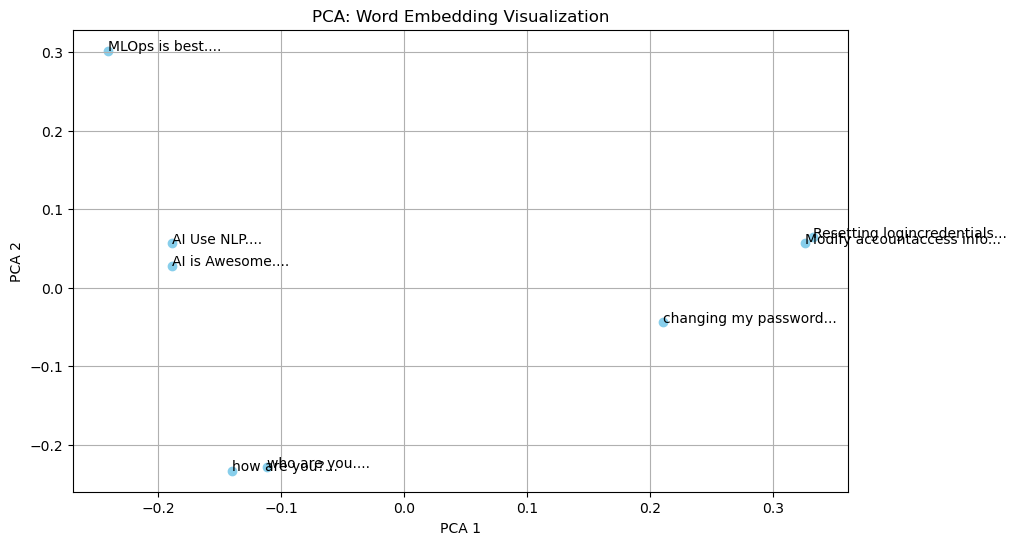

In [22]:
#2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_array)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='skyblue')

for i, label in enumerate(labels):
    plt.annotate(label, (pca_result[i, 0], pca_result[i, 1]))

plt.title("PCA: Word Embedding Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()